In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# create two donuts
N = 500
np.random.seed(4)

r1 = np.random.randn(N)+10 # N number of points with Radius 10
r2 = np.random.randn(N)+5 # N number of points with Radius 5

theta = 2*np.pi*np.random.randn(N) # Angle for each point
x1 = np.array([r1*np.sin(theta), r1*np.cos(theta)]).T # Polar Coordinates of the points for Big Donut
x2 = np.array([r2*np.sin(theta), r2*np.cos(theta)]).T # Polar Coordinates of the points for Small Donut

X = np.vstack((x1,x2)) # input Nx2
T = np.array([0]*N+[1]*N) # target N

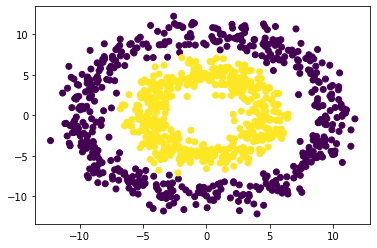

In [80]:
# Scatter plot
plt.scatter(X[:,0],X[:,1], c=T)
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [6]:
def relu(z):
    return z*(z>0)

In [7]:
def nonlinearDer(z, activation):
    if activation=="sigmoid":
        return z*(1-z)
    if activation=="tanh":
        return (1-z**2)
    if activation=="relu":
        return z>0

In [8]:
def cost(y,yhat):
    return -np.mean(y*np.log(yhat)+(1-y)*np.log(1-yhat))

In [9]:
def forward(x,hidden_nodes,activation,i,seed,W,B,A):
    N = x.shape[0] # N.samples
    D = x.shape[1] # N.features
    L = len(hidden_nodes) # N.hidden layers
    Y=0 # Predicted output
    np.random.seed(seed)
    
    for l in range(L+1):
        if l==0:
            if i==0:
                W[l] = np.random.randn(D,hidden_nodes[l])
                B[l] = np.random.randn(hidden_nodes[l])
            A[l] = activation(np.dot(x,W[l])+B[l])
        
        elif l==L:
            if i==0:
                W[l] = np.random.randn(hidden_nodes[l-1])
                B[l] = np.random.randn(1)
            A[l] = sigmoid(np.dot(A[l-1],W[l])+B[l])
            Y = A[l]
        
        else:
            if i==0:
                W[l] = np.random.randn(hidden_nodes[l-1],hidden_nodes[l])
                B[l] = np.random.randn(hidden_nodes[l])
            A[l] = activation(np.dot(A[l-1],W[l])+B[l])
    
    return W,B,A,Y

In [10]:
def backprop(x,T,Y,hidden_nodes,activation,lr,W,B,A):
    L = len(hidden_nodes)
    E,grad = {},{}
    
    for l in range(L,-1,-1):
        if l==L:
            E[l] = (T-Y)
            grad[l] = E[l]
        
        elif l==0:
            if grad[l+1].ndim==1:
                E[l] = np.outer(grad[l+1],W[l+1]) # Binary logit
                grad[l] = E[l]*nonlinearDer(A[l], activation.__name__)
            else:
                E[l] = np.dot(grad[l+1],W[l+1].T) # K Logits
                grad[l] = E[l]*nonlinearDer(A[l], activation.__name__)
        
        else:
            E[l] = np.dot(grad[l+1],W[l+1].T)
            grad[l] = E[l]*nonlinearDer(A[l], activation.__name__)
            
    for i in range(L+1):
        if i==0:
            W[i] += lr*np.dot(x.T,grad[i])
            B[i] += lr*np.sum(grad[i], axis=0)
        else:
            W[i] += lr*np.dot(A[i-1].T,grad[i])
            B[i] += lr*np.sum(grad[i], axis=0)
            
    return W,B,A

In [11]:
def fit(x,T,hidden_nodes,activation,lr,iterations,seed):
    W,B,A = {},{},{}
    C = []
    
    for i in range(iterations):
        W,B,A,Y = forward(x,hidden_nodes,activation,i,seed,W,B,A)
        W,B,A = backprop(x,T,Y,hidden_nodes,activation,lr,W,B,A)
        
        C.append(cost(T,Y))
        
    return C,Y

In [12]:
def accuracy(y,yhat):
    return np.mean(y==yhat)

In [14]:
C, Yhat = fit(X,T,[5],sigmoid,0.01,10000,seed=1)
print("Accuracy: {}%".format(accuracy(T,np.round(Yhat))*100))

Accuracy: 100.0%


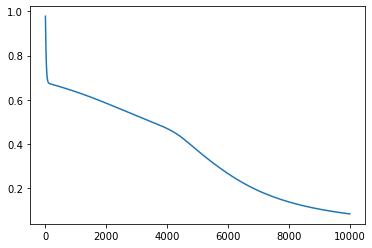

In [15]:
plt.plot(C)
plt.show()